# Project 9: Shape and texture of damselflies (or parts of them)

In this project, the goal is to extract highly dimensional shape and texture traits from the damselfly *Ischnura elegans* to investigate the role of correlational selection in a female limited colour polymorphism.  

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_9_before.jpg)

**Input** - The common bluetail (*Ischnura elegans*), imaged with a flatbed scanner inside a petri dish. 
    
</div>
<div class="col-md-6" style="flex: 1 1 0px;">
    
![After](_figures/project_9_after.jpg)

**Results** - Using multiple contour editing and detection steps the outline ouf the whole animal, as well as specific body parts are segmented.
</div>
</div>

Images kindly provided by Erik Svensson.

## Background 

The common bluetail damselfly (*Ischnura elegans*) expresses remarkably stable female-limited colour polymorphisms across natural populations in Skane (Fig. 1). Females of *I. elegans* go through a series of abdominal colour changes during development, which results in three female colour morphs: one androchrome morph and two gynochrome morphs (infuscans and infuscans-obsoleta). One hypothesized mechanism thought to stabilize sexual polymorphisms in nature is correlational selection, which occurs when multiple traits (e.g. colouration, morphology or behavior) affect fitness in an interactive way

<center>
<div style="width:600px; text-align: left">
    
![phenotyping setup](_figures/project_9_polymorphism.jpg)
    
**Figure 1:** Frequency dependent sexual polymorphisms in Ischnura elegans. Females of *I. elegans* have three female colour morphs: A (androchrome = male mimicking), I (infuscans) and O (infuscans obsoleta). Selection on multiple traits, i.e., correlational selection, is hypothesized to stabilize morph frequencies over time. 
    
</div>
</center>

To investigate correlational selection as a stabilizing agent for sexual polymorphisms, a comprehensive analysis of multivariate phenotypes is needed to understand the phenotypic consequences of correlational selection in polymorphic systems. To do so, shape and texture traits are extracted from a large dataset containing images of damselflies belonging to different populations in Skane - this work is conducted by [Prof. Erik Svensson and his group](https://portal.research.lu.se/en/persons/erik-svensson). 

The segmentation labels that are created with this phenopype configuration will be used to collect training data (from ~ 1500 imgs) to implement a convolutional neural network to perform semantic segmentation on the entire dataset (~ 20000 imgs). However, as an intermediate goal, shape and texture features are extracted to get a first glimpse of how well the collected multivariate, [phenomic data](https://www.frontiersin.org/articles/10.3389/fevo.2021.642774/full) fit the expectations.

## Preparation

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "project_9"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

could not retrieve template from online repo
D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_9.yaml


## Extract ROI from images

To have an image size that is more easily manageable, the petridishes are detected and extracted with the `detect_mask` function shown in https://www.phenopype.org/gallery/project_7/. Then, using `save_ROI`, the region of interest (ROI) are saved, and used for the project creation

<center>
<div style="width:600px; text-align: left">
    
![phenotyping setup](_figures/project_9_roi_detection.jpg)
    
**Figure 2:** Robust circle detection using `detect_mask` 
    
</div>
</center>

In [2]:
## load image
img_full = pp.load_image("../../gallery/data/damselflies.jpg")

## detect_mask needs single channel images
gray = pp.preprocessing.decompose_image(img_full, channel="gray")

## detect circles 
circles = pp.preprocessing.detect_mask(
    gray, shape="circle", resize=0.25, circle_args={
        "param1":200, 
        "param2":150,
        "min_dist":1000, 
        "min_radius":600, 
        "max_radius":800}
    )

## create directory to store ROI images
if not os.path.isdir("ROI"):
    os.makedirs("ROI")
    
## save all ROIs as separate jpeg files
pp.export.save_ROI(
    image=img_full, 
    annotations=circles, 
    file_name="odonata",
    suffix="roi",
    dir_path="ROI"
    )



- decompose image: using gray channel
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
Found 4 circles


## Project

In [5]:
proj = pp.Project("project")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project

Project "project" successfully loaded with 4 images
--------------------------------------------


In [6]:
## import images from the ROI folder
proj.add_files(image_dir = "ROI")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\ROI

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: [], exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image odonata_roi_00.tif - 0__odonata_roi_00 already exists (overwrite=False)
Found image odonata_roi_01.tif - 0__odonata_roi_01 already exists (overwrite=False)
Found image odonata_roi_02.tif - 0__odonata_roi_02 already exists (overwrite=False)
Found image odonata_roi_03.tif - 0__odonata_roi_03 already exists (overwrite=False)

Found 4 files
--------------------------------------------


In [7]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_00\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_01\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_02\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_03\pype_config_v1.yaml (overwritten)


In [8]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"comment": ["a"],
"contour": ["a", "b", "c"],
"drawing": ["a", "b"]
}
Fixed method name
updating pype config file


------------+++ new pype iteration 2022-01-20 19:23:32 +++--------------




PREPROCESSING
write_comment
- loaded existing annotation of type "comment" with ID "a": skipping (edit=False)
blur


SEGMENTATION
threshold
- decompose image: using blue channel
morphology
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 1 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=False)
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 1 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "b": skipping (edit=False)
detect_contour
-

SystemExit: 

TERMINATE (by user)

C:\Anaconda3\envs\pp_dev\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Modify config to extract shape and texture features

In [12]:
target1 = """    - export:"""
replacement1 = """    - measurement:
        - compute_shape_features:
            contour_id: b
        - compute_shape_features:
            contour_id: c
        - compute_texture_features:
            channels: [r, g, b, h, s, v]
            contour_id: b
        - compute_texture_features:
            channels: [r, g, b, h, s, v]
            contour_id: c
    - export:"""

proj.edit_config(tag="v1", target=target1, replacement=replacement1)

# phenopype gallery project 9
# ----------------------------
# segment damselflies and quantify shape and texture of their body parts

config_info:
    config_name: pype_config_v1.yaml
    date_created: '2022-01-20 19:23:30'
    date_last_modified:
    template_name: gallery_project_9.yaml
    template_path: D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_9.yaml
processing_steps:
    - preprocessing:
        - write_comment:
            ANNOTATION: {type: comment, id: a, edit: false}
            label: ID
        - blur:
            kernel_size: 5
    - segmentation:
        - threshold:
            method: binary
            value: 90
            channel: blue
        - morphology:
            operation: open
            shape: cross
            kernel_size: 7
            iterations: 2
        - morphology:
            operation: close
            shape: ellipse
            kernel_size: 5
            iterations: 3
        - detect_contour:
      

In [13]:
## run image processing with deactivated feedback 
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", feedback=False)

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"comment": ["a"],
"contour": ["a", "b", "c"],
"drawing": ["a", "b"]
}
updating pype config file


------------+++ new pype iteration 2022-01-20 19:26:25 +++--------------




PREPROCESSING
write_comment
- loaded existing annotation of type "comment" with ID "a": skipping (edit=False)
blur


SEGMENTATION
threshold
- decompose image: using blue channel
morphology
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 1 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=False)
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 1 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "b": skipping (edit=False)
detect_contour
- loaded existing a

Processing r channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  8.08it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.82it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.82it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83it/s]


compute_texture_features
- decompose image: using r channel


Processing r channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.18it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.33it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.72it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.89it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.59it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.33it/s]




EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_00\canvas_v1.jpg (overwritten).
save_annotation
- loading existing annotation file
- updating annotation of type "comment" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "b" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "b" to "annotations_v1.json"
- writing annotation of type "tex

Processing r channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 27.04it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 27.01it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 27.76it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 28.57it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 27.76it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 27.01it/s]


compute_texture_features
- decompose image: using r channel


Processing r channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.72it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 36.17it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.71it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.84it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.72it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 35.38it/s]




EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_01\canvas_v1.jpg (overwritten).
save_annotation
- loading existing annotation file
- updating annotation of type "comment" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "b" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "b" to "annotations_v1.json"
- writing annotation of type "tex

Processing r channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.37it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.39it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.36it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 24.06it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 23.81it/s]


compute_texture_features
- decompose image: using r channel


Processing r channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.62it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.90it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 33.73it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 34.26it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 34.48it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 34.31it/s]




EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_02\canvas_v1.jpg (overwritten).
save_annotation
- loading existing annotation file
- updating annotation of type "comment" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "b" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "b" to "annotations_v1.json"
- writing annotation of type "tex

Processing r channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.00it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.36it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.60it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.21it/s]


compute_texture_features
- decompose image: using r channel


Processing r channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.52it/s]


- decompose image: using g channel


Processing g channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.77it/s]


- decompose image: using b channel


Processing b channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.77it/s]


- decompose image: using h channel


Processing h channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.52it/s]


- decompose image: using s channel


Processing s channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 31.34it/s]


- decompose image: using v channel


Processing v channel texture features: 100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 32.52it/s]




EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\data\0__odonata_roi_03\canvas_v1.jpg (overwritten).
save_annotation
- loading existing annotation file
- updating annotation of type "comment" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "drawing" with id "b" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotation of type "shape_features" with id "b" to "annotations_v1.json"
- writing annotation of type "tex

In [14]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations", overwrite=True)

Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__odonata_roi_00
0__odonata_roi_00_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\results\annotations\0__odonata_roi_00_annotations_v1.json.
Collected annotations_v1.json from 0__odonata_roi_01
0__odonata_roi_01_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\results\annotations\0__odonata_roi_01_annotations_v1.json.
Collected annotations_v1.json from 0__odonata_roi_02
0__odonata_roi_02_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_9\project\results\annotations\0__odonata_roi_02_annotations_v1.json.
Collected annotations_v1.json from 0__odonata_roi_03
0__odonata_roi_03_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-galler

C:\Anaconda3\envs\pp_dev\lib\site-packages\ipyplot\_utils.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(seq)



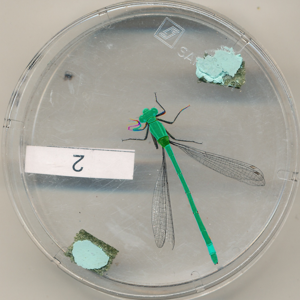
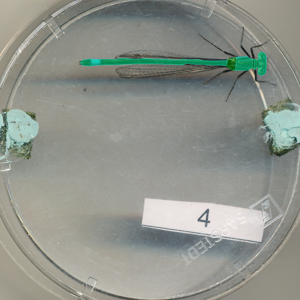
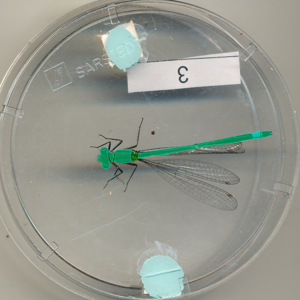
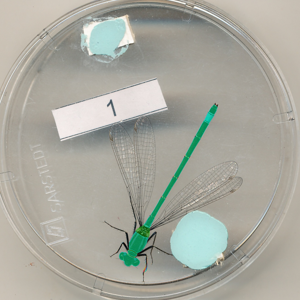


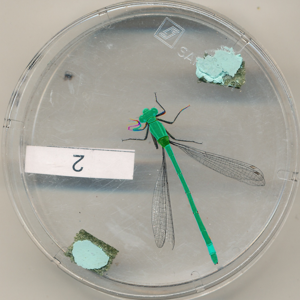
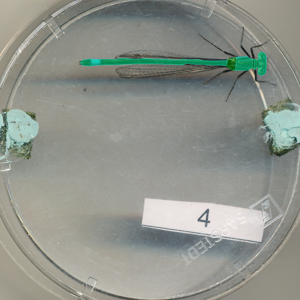
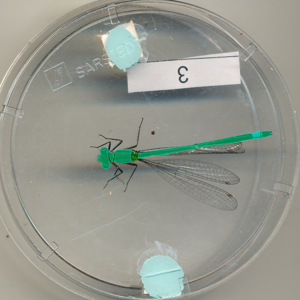
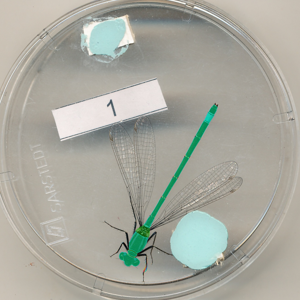

In [15]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)